# Évaluation - Segmentation dans une image de ruche

CHEN Shiyi <br/>
Mines ParisTech - Semaine PSL <br/>
December 2020

In [1]:
import sys
sys.path.append('/home/commun/tp-morpho/')
from tp_init import *

# Load input image
# im = Image(images_dir+'Other/projet-abeilles/abeilles1.png')
#im = Image(images_dir+'Other/projet-abeilles/abeilles1_couleur.png')
# im = Image(images_dir+'Other/projet-abeilles/abeilles2.png')
#im = Image(images_dir+'Other/projet-abeilles/abeilles2_couleur.png')
im = Image(images_dir+'Other/projet-abeilles/abeilles3.png')
#im = Image(images_dir+'Other/projet-abeilles/abeilles3_couleur.png')
#im = Image(images_dir+'Other/projet-abeilles/abeilles4.png')
#im = Image(images_dir+'Other/projet-abeilles/abeilles4_couleur.png')

## 1. Séparer les abeilles et le fond

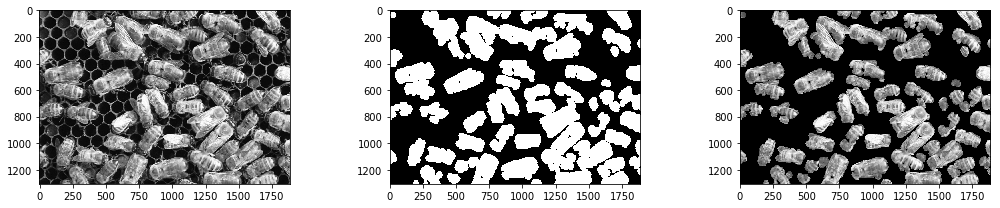

In [2]:
imthre, imopen, imfil, immark_in, imws, imOut1 = Image(im), Image(im), Image(im), Image(im), Image(im), Image(im)
nl = HexSE()

# pre-processing
# threshold method to change the grayscaled picture to a black-and-white one 
t = 50
threshold(im, t, imthre)
# remove the fine alveolus in the background using an opening
open(imthre, imopen, nl(20))

compare(imopen, "==", 255, im, 0, imOut1)
disp([im, imopen, imOut1])

The method has successfully separated the bees from the background, even in some area where the bee shows only a head. However, the method doesn't work very well if the bee is "hiden" behind the alveolus or the color of the part is dark enough so that it cannot distinguished from the alveolus.

## 2. Extraiter la structure d'alvéole

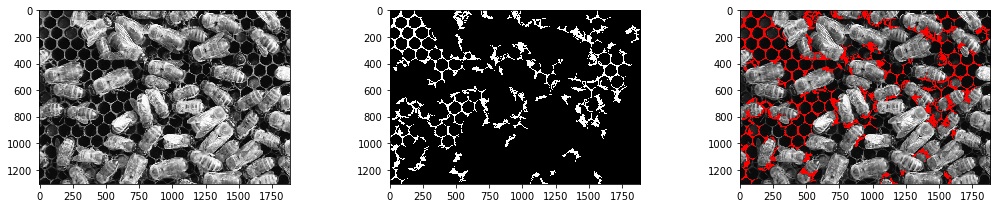

In [3]:
imstr, imbuild, imOut2 = Image(im), Image(im), Image(im)
nl = HexSE()

# remove the bees from the original image
sub(imthre, imopen, imstr)

# remove the small details of alveolus
buildOpen(imstr, imbuild, nl(10))

imOut2 = colorHighlight(im, imbuild)
disp([im, imbuild, imOut2])

Most of the alveolus are extracted, but some of them are eliminated during the "buildOpen" process because they are fine enough. On the contrary, some small pieces of bees are regarded as alveolus. I tried the reconstruction by HexSE in 3 directions, but it doesn't work well.

## 3. Segmenter les abilles individuellement

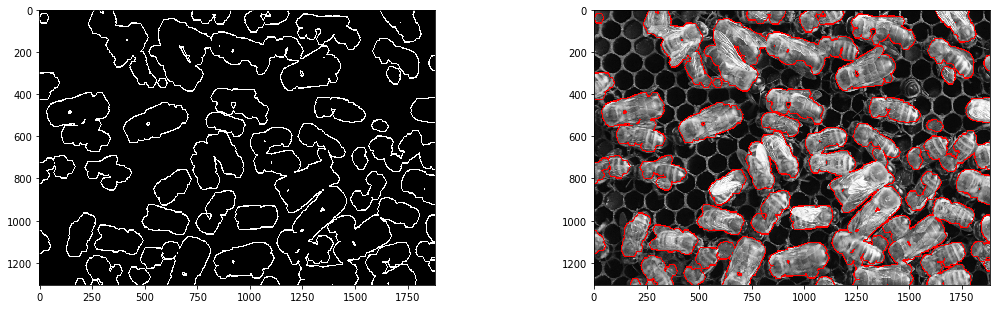

In [4]:
imgra, imOut3 = Image(im), Image(im)
nl = HexSE()

# extract the border using gradient method
gradient(imopen, imgra, nl(3))
imOut3 = colorHighlight(im, imgra)

disp([imgra, imOut3])

The bees are segmented as individuals using the gradient method to detect the borders. However, some parts of bee, for example, the heads, are excluded because of a darker color than the body. Moreover, there are regional minimas which are recognised as borders, so there are small points inside the real border on the bees.